# cifar10 classification using CNN

#### 1. import packages

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm, trange
from CNN import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Prepare dataset

Constants

In [2]:
batchSize = 100
device = get_default_device()

Download images

In [3]:
if 'cifar10' not in os.listdir('datasets/'):
    # Dowload the dataset
    dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
    download_url(dataset_url, '.')

    # Extract from archive
    with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
        tar.extractall(path='./datasets')
    
data_dir = './datasets/cifar10'

Split into sets

In [4]:
trainSet = ImageFolder(data_dir+'/train', transform=ToTensor())
testSet = ImageFolder(data_dir+'/test', transform=ToTensor())
trainSet, valSet = random_split(trainSet, [45000, 5000])

Data loaders

In [5]:
trainLoader = DataLoader(trainSet, batchSize, shuffle=True, num_workers=4, pin_memory=True)
valLoader = DataLoader(valSet, batchSize, shuffle=False, num_workers=4, pin_memory=True)
testLoader = DataLoader(testSet, batchSize, shuffle=False, num_workers=4, pin_memory=True)

trainLoader = DeviceDataLoader(trainLoader, device)
valLoader = DeviceDataLoader(valLoader, device)
testLoader = DeviceDataLoader(testLoader, device)

#### 3. Train model

In [6]:
model = Cifar10_CNN()
to_device(model, device);

Constants

In [7]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [8]:
modelAccuracy = [evaluate(model, valLoader)]
modelAccuracy += fit(num_epochs, lr, model, trainLoader, valLoader, opt_func)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [0], train_loss: 1.7155, val_loss: 1.3081, val_acc: 0.5182


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.1674, val_loss: 1.0582, val_acc: 0.6144


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9182, val_loss: 0.9115, val_acc: 0.6788


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.7490, val_loss: 0.7667, val_acc: 0.7272


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.6147, val_loss: 0.8010, val_acc: 0.7352


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.5056, val_loss: 0.7056, val_acc: 0.7626


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.4017, val_loss: 0.6954, val_acc: 0.7676


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.3133, val_loss: 0.8046, val_acc: 0.7600


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.2411, val_loss: 0.8880, val_acc: 0.7618


  0%|          | 0/450 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.1837, val_loss: 0.9183, val_acc: 0.7626


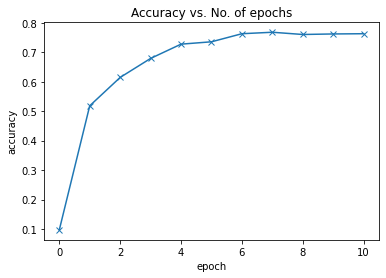

In [9]:
accuracies = [x['val_acc'] for x in modelAccuracy]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

#### 4. Test model

Overall accuracy

In [10]:
# Overall test accuracy
result = evaluate(model, testLoader)
print(f"Test accuracy={result['val_acc']}")

Test accuracy=0.7634000182151794


Image display

Label: bird , Predicted: frog


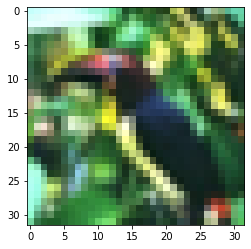

In [11]:
img, label = testSet[int(torch.randint(0, len(testSet), (1,1)))]
plt.imshow(img.permute(1, 2, 0))
print('Label:', testSet.classes[label], ', Predicted:', predict_image(img, model, testSet.classes, device))

#### Save and load model

Save model

In [15]:
torch.save(model.state_dict(), 'modelParameters/cifar10-cnn.pth')

Load model

In [16]:
model2 = to_device(Cifar10_CNN(), device)
model2.load_state_dict(torch.load('modelParameters/cifar10-cnn.pth'))

<All keys matched successfully>